In [2]:
# !pip install ultralytics

In [19]:
# Import Libraries
import torch
from ultralytics import YOLO
from IPython.display import Image
import glob
import os.path

In [4]:
# Check Nvidia Version
!nvidia-smi

Thu Mar 30 22:43:08 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 527.37       Driver Version: 527.37       CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   63C    P8     4W /  N/A |      0MiB /  4096MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [5]:
# Check Torch Version
torch.__version__

'2.0.0+cu117'

In [6]:
# Check if we are using CUDA
torch.cuda.is_available()

True

In [7]:
# Clear GPU Memory Cashe
torch.cuda.empty_cache()

<img src="Screenshot (130).png"><br>
I used the yolov8m as it has good accuracy and doesn't take long time to train like the yolov8l and the yolo8x

In [8]:
# Model to Use
model = YOLO("yolov8m.pt")

In [ ]:
# Train the model, use train and test data and the classes referenced in the data.yaml file
# I trained useing 4 workers and batches because that's the maximum my GPU memory can handle
# I used 25 Epochs only as it takes over 18 hours to train using more epochs will require days for the model to finish training
model.train(epochs= 25, data='data.yaml', model="yolov8m.pt", workers=4, batch=4)

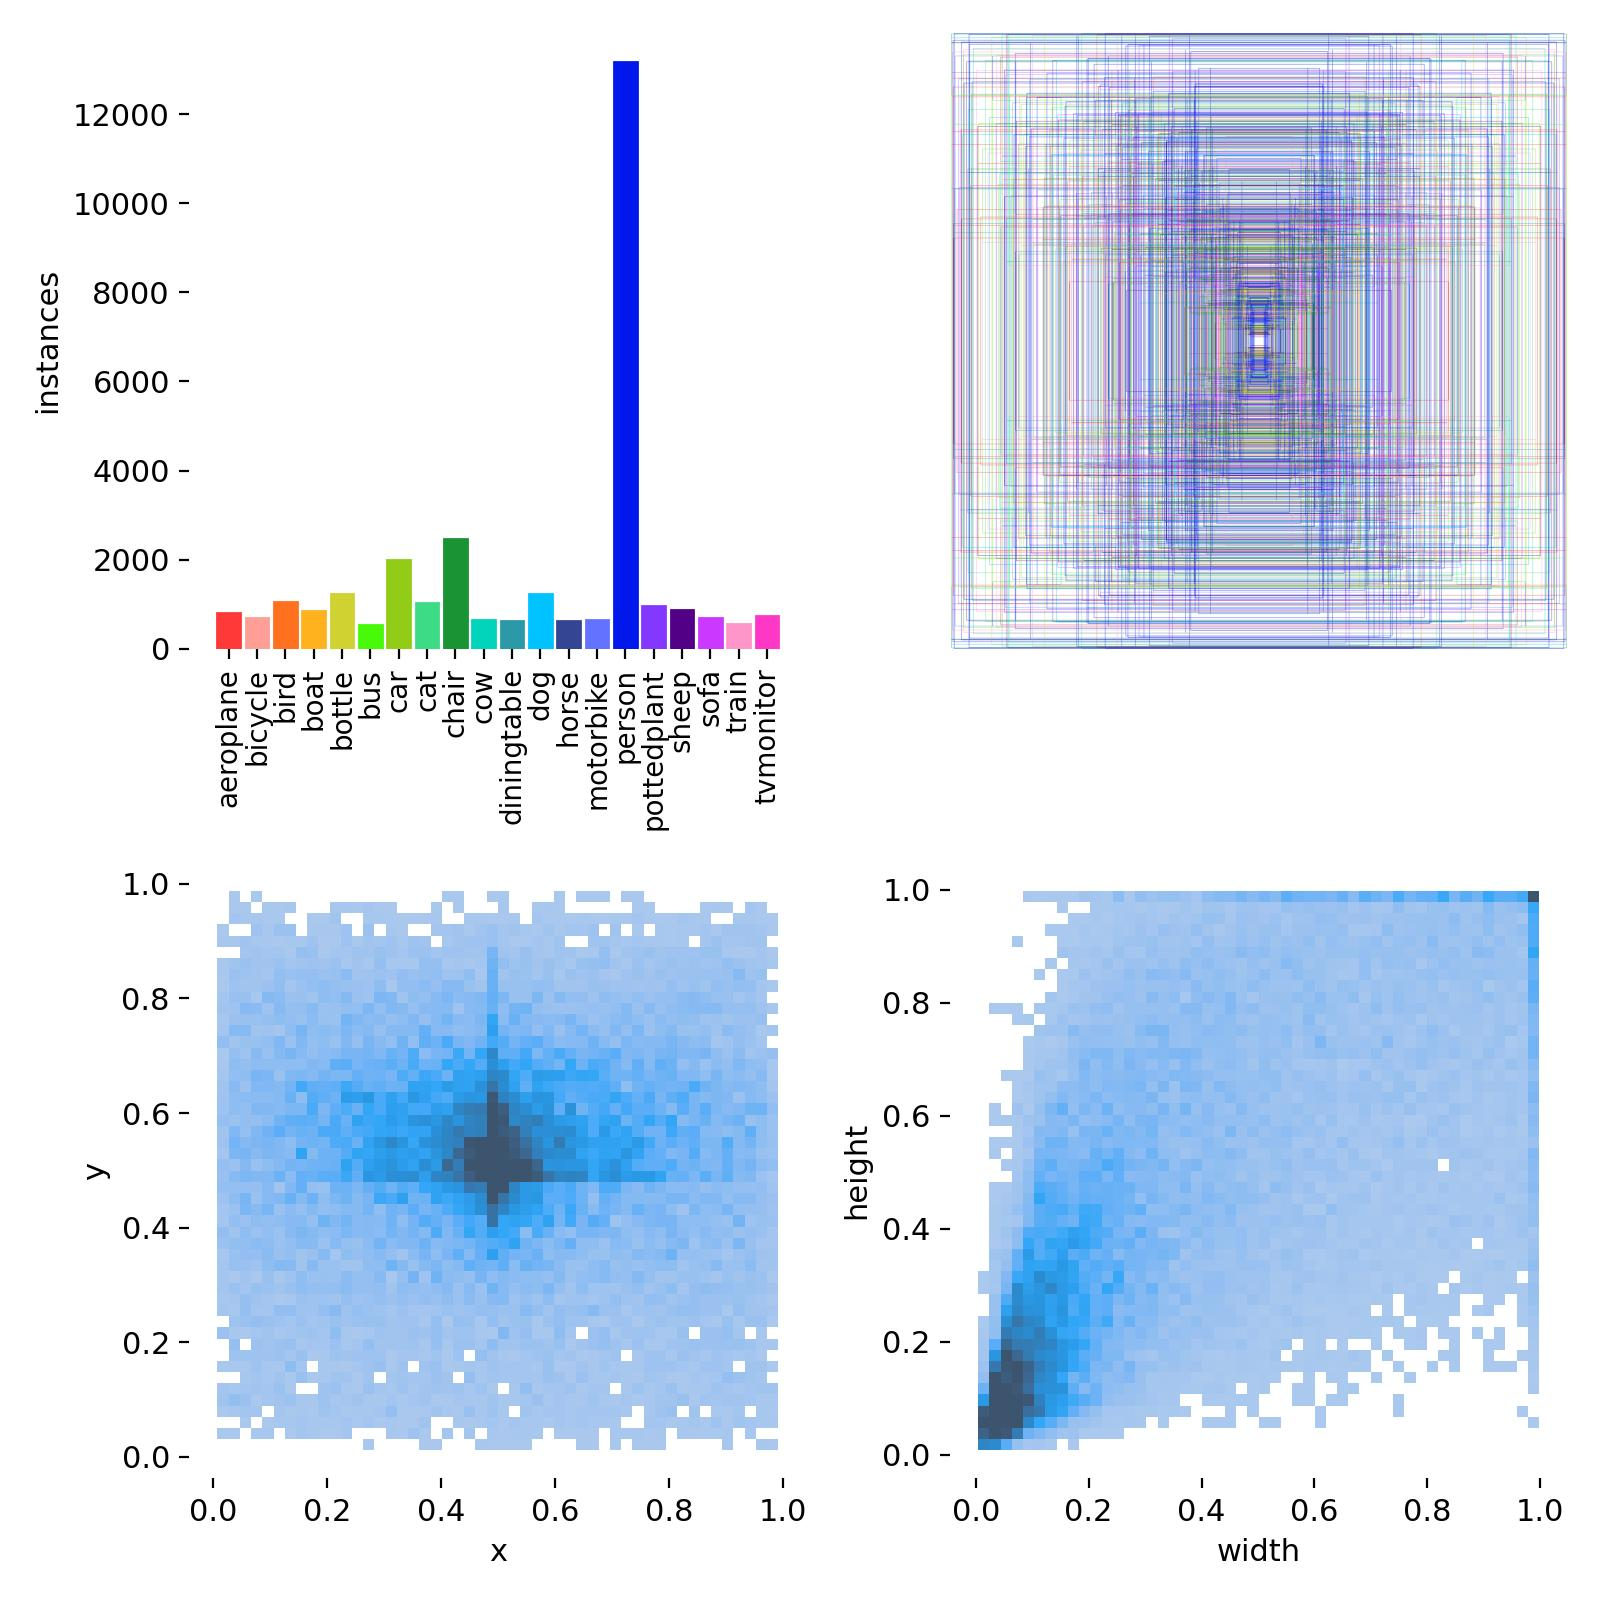

In [20]:
# Classes used in the training
Image(filename="runs/detect/train_25Epochs/labels.jpg")

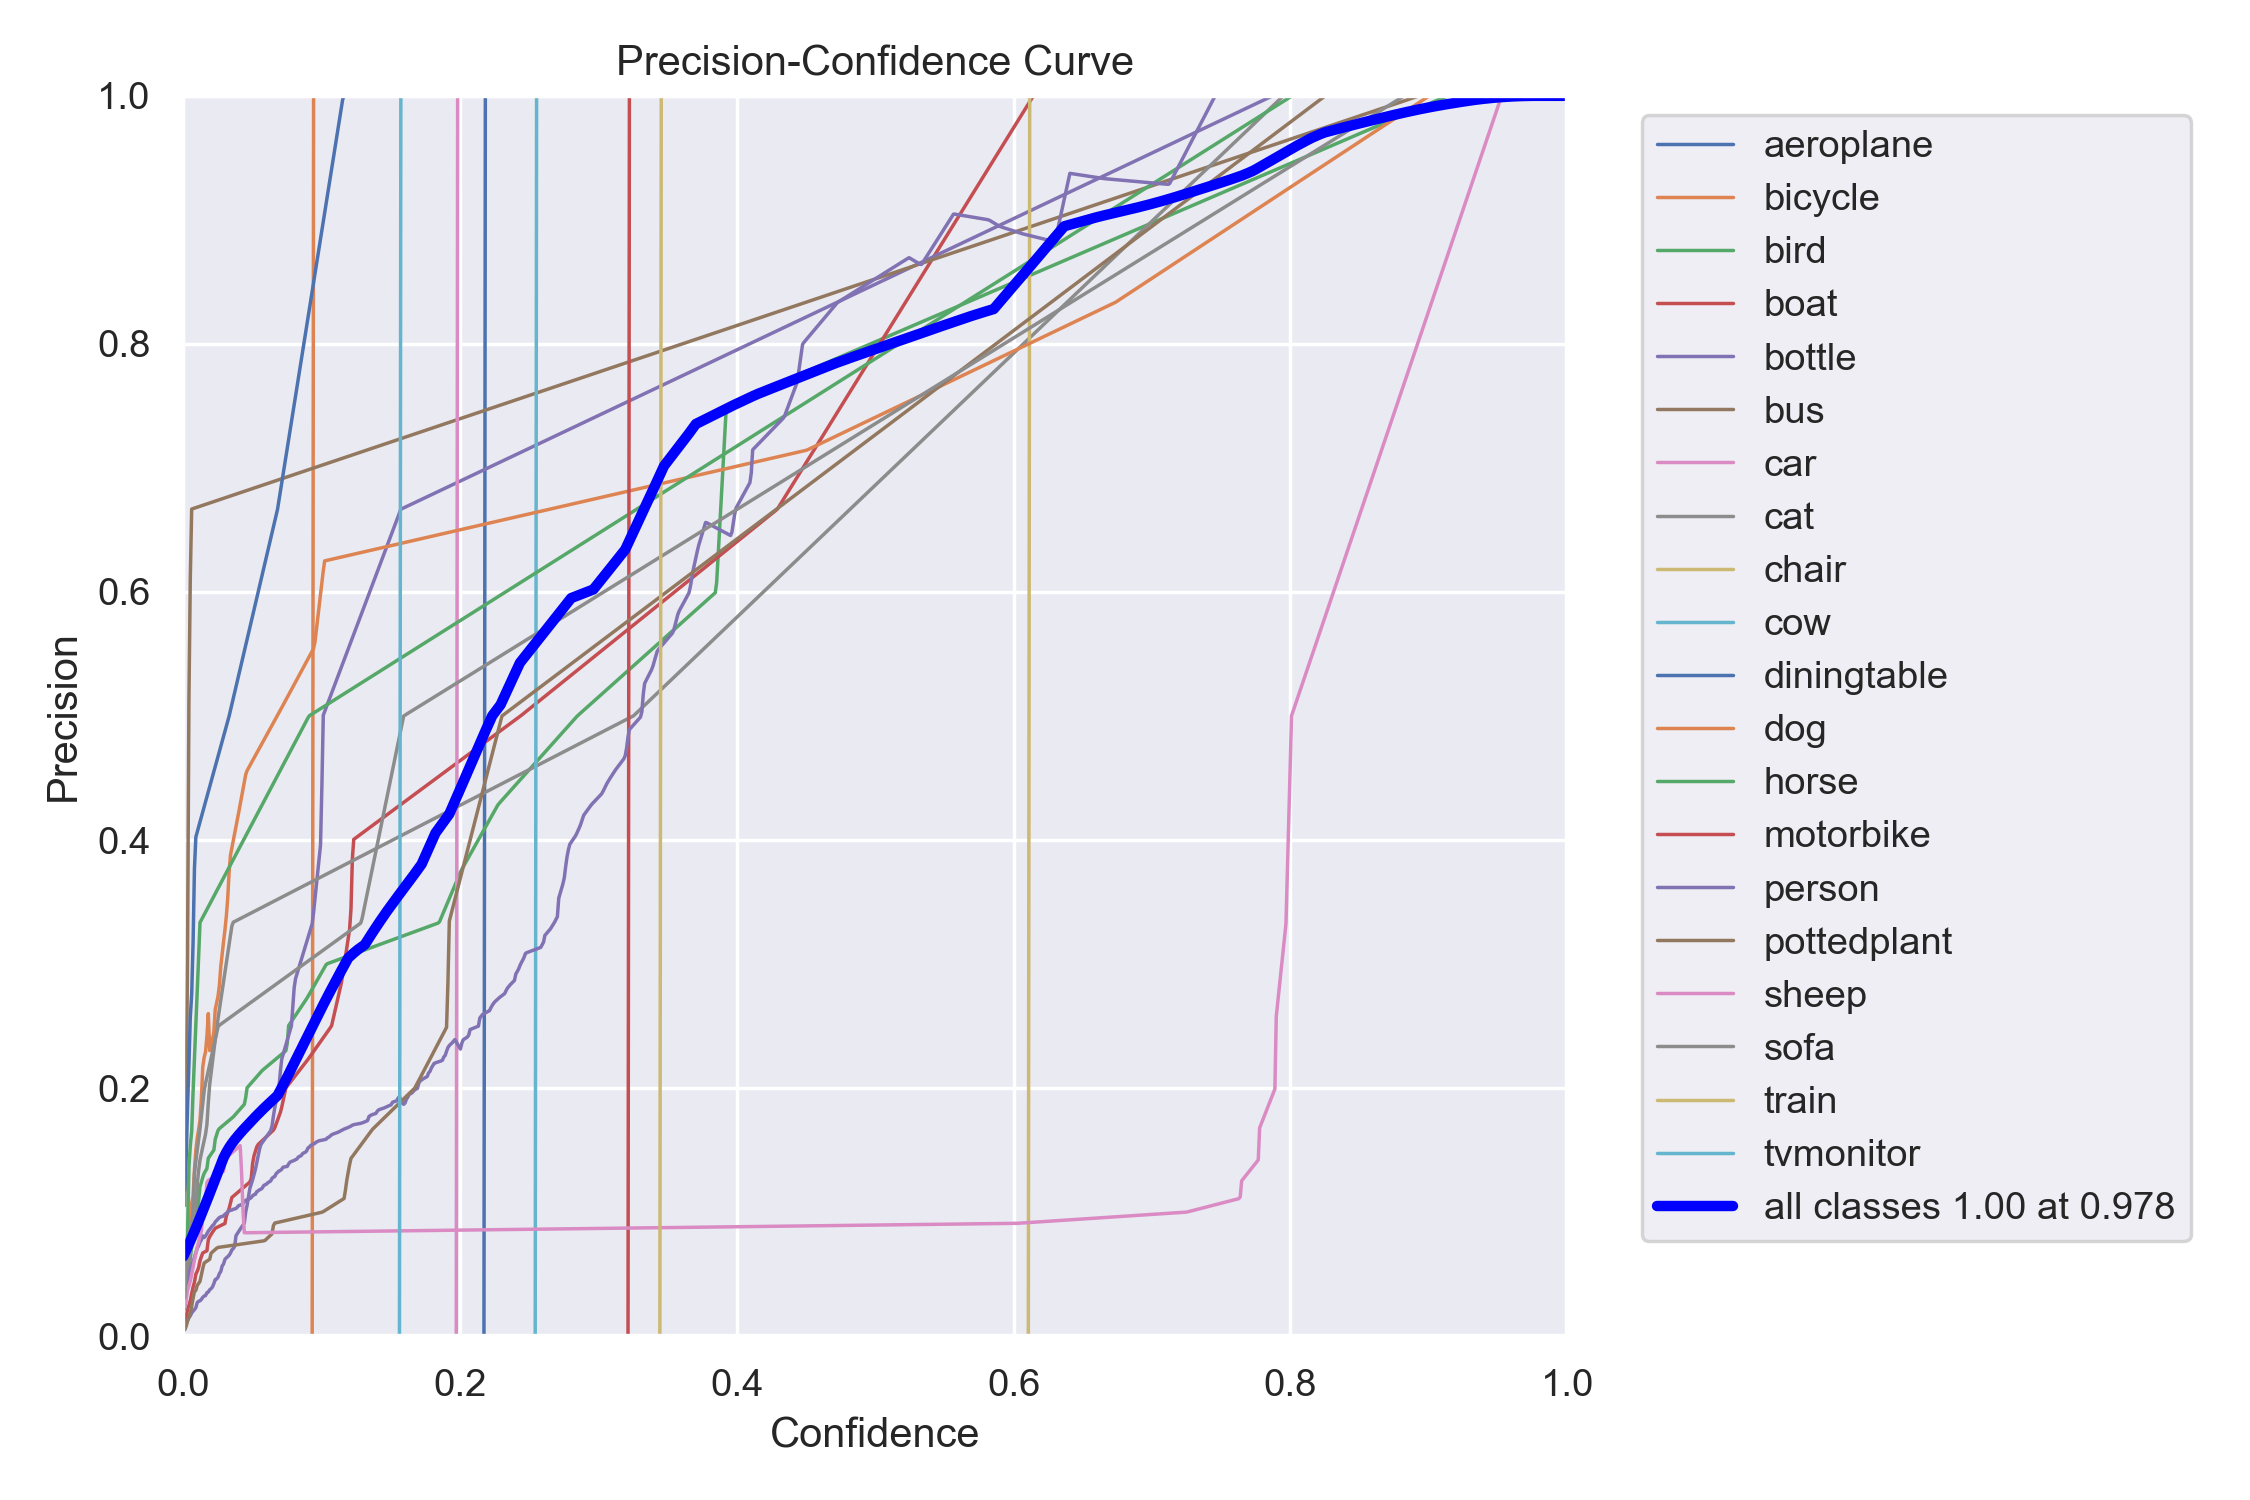

In [10]:
# Trained Model Precision Curve
Image(filename="runs/detect/train_25Epochs/P_curve.png")

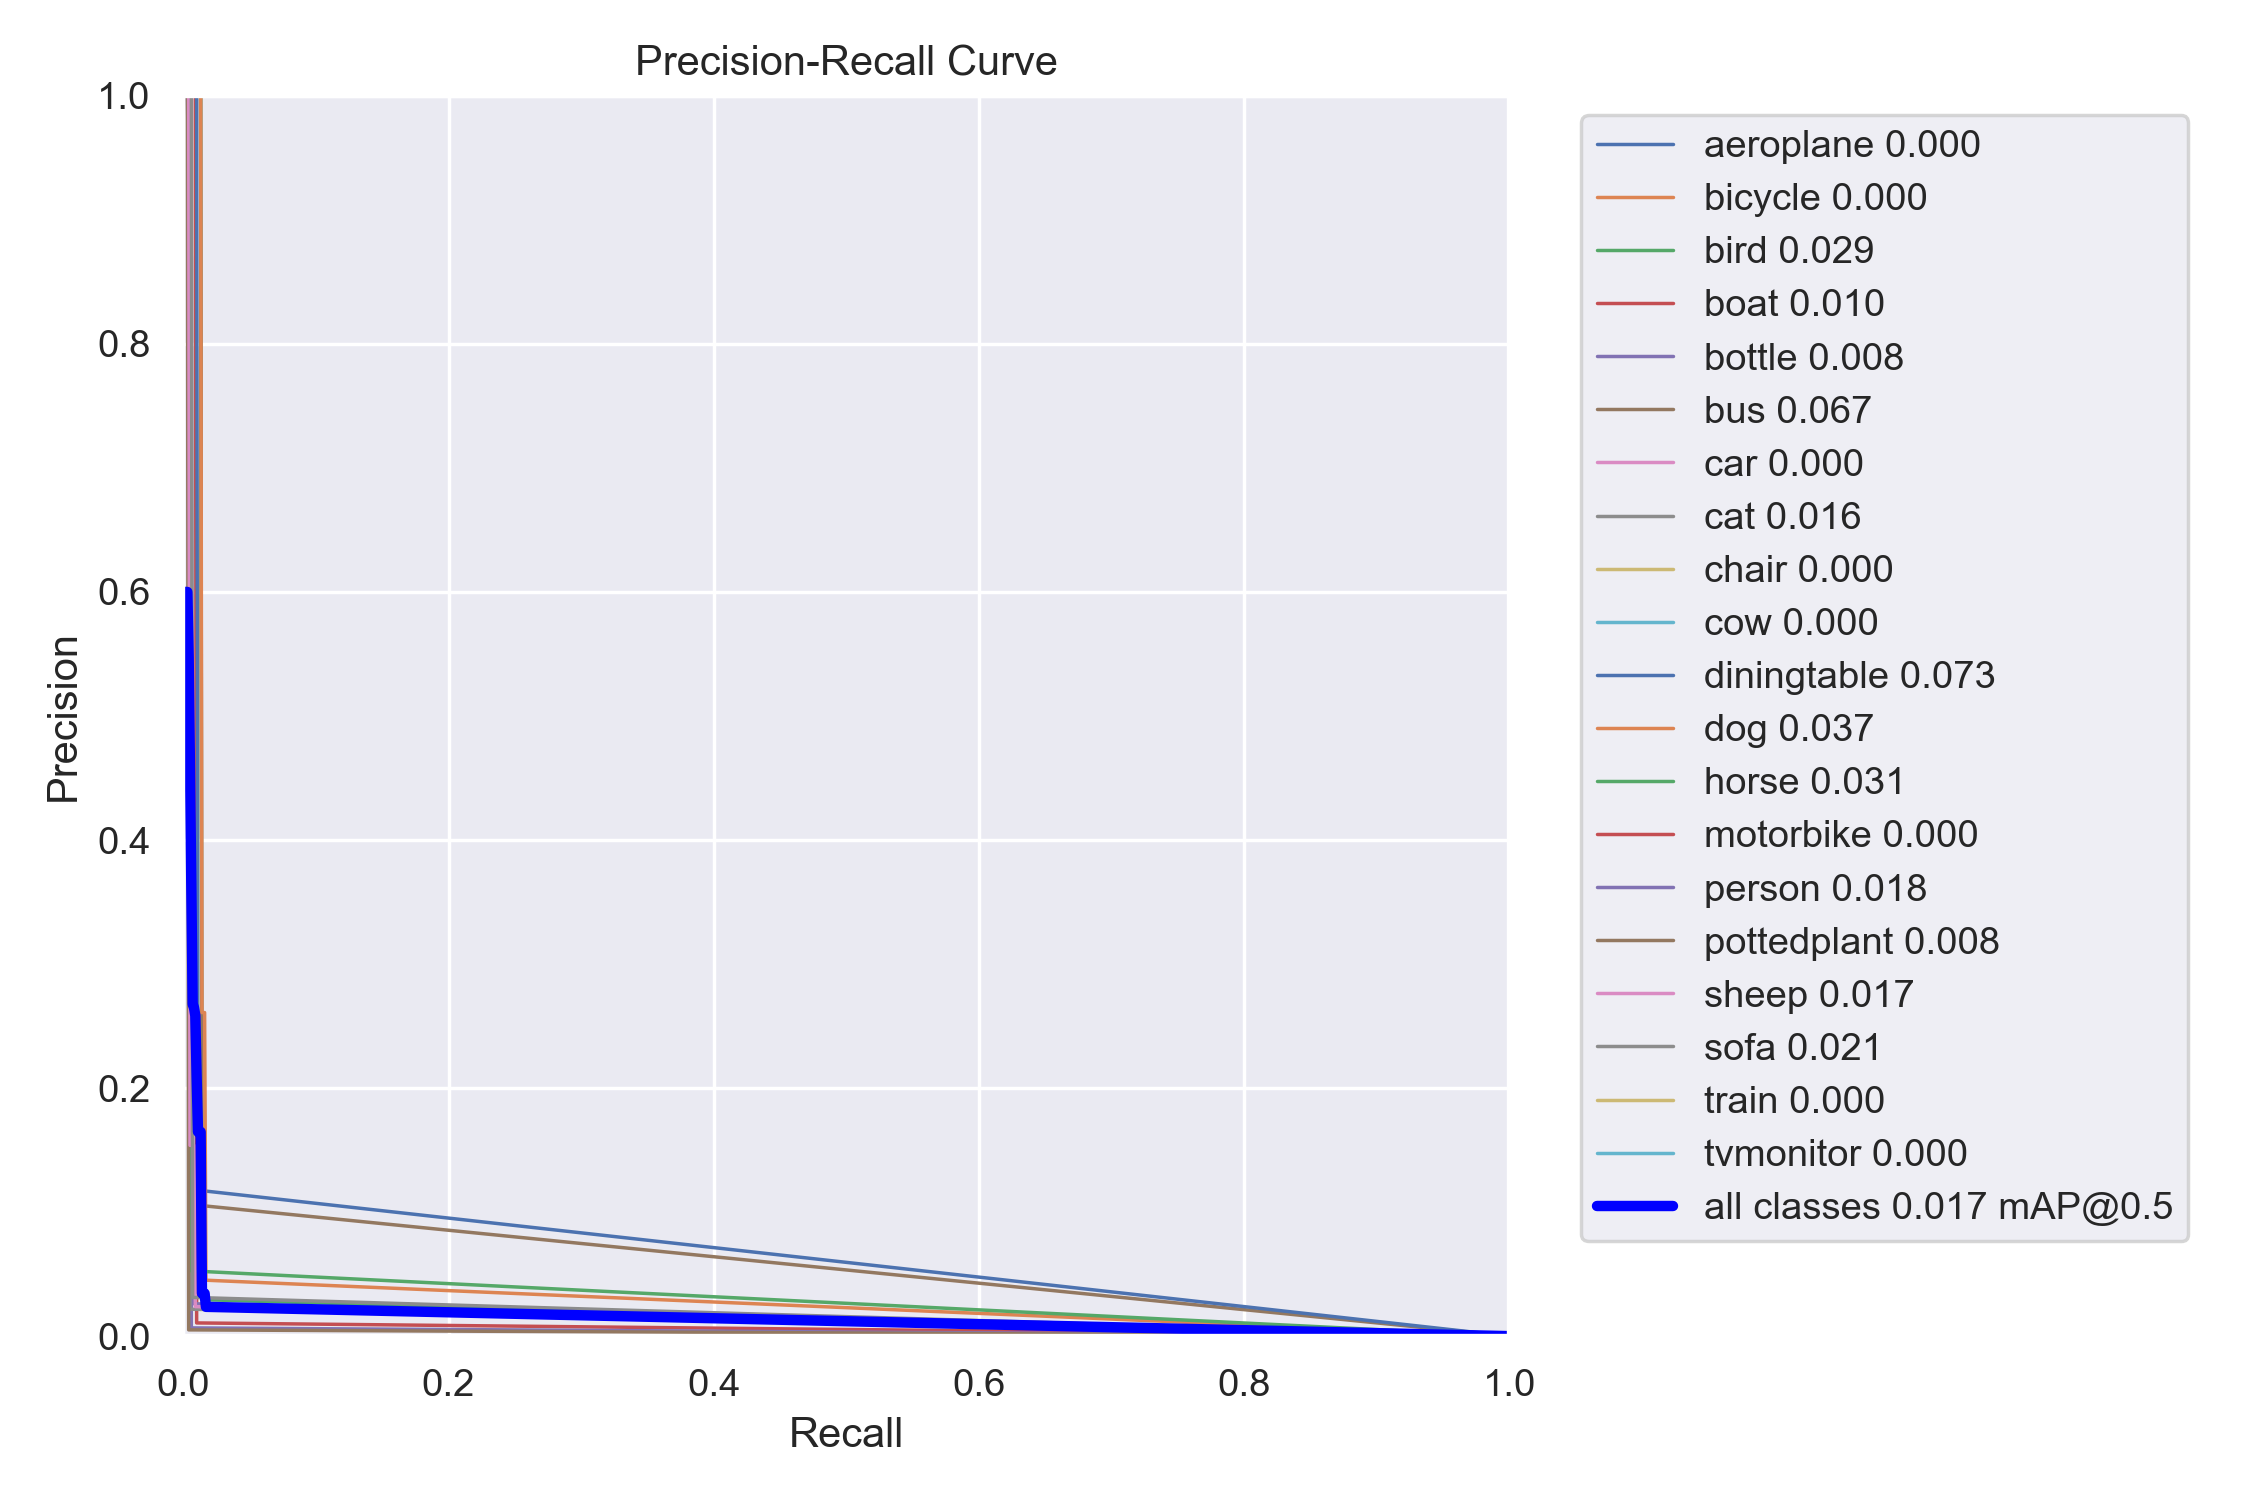

In [11]:
# Trained Model Recall Curve
Image(filename="runs/detect/train_25Epochs/PR_curve.png")

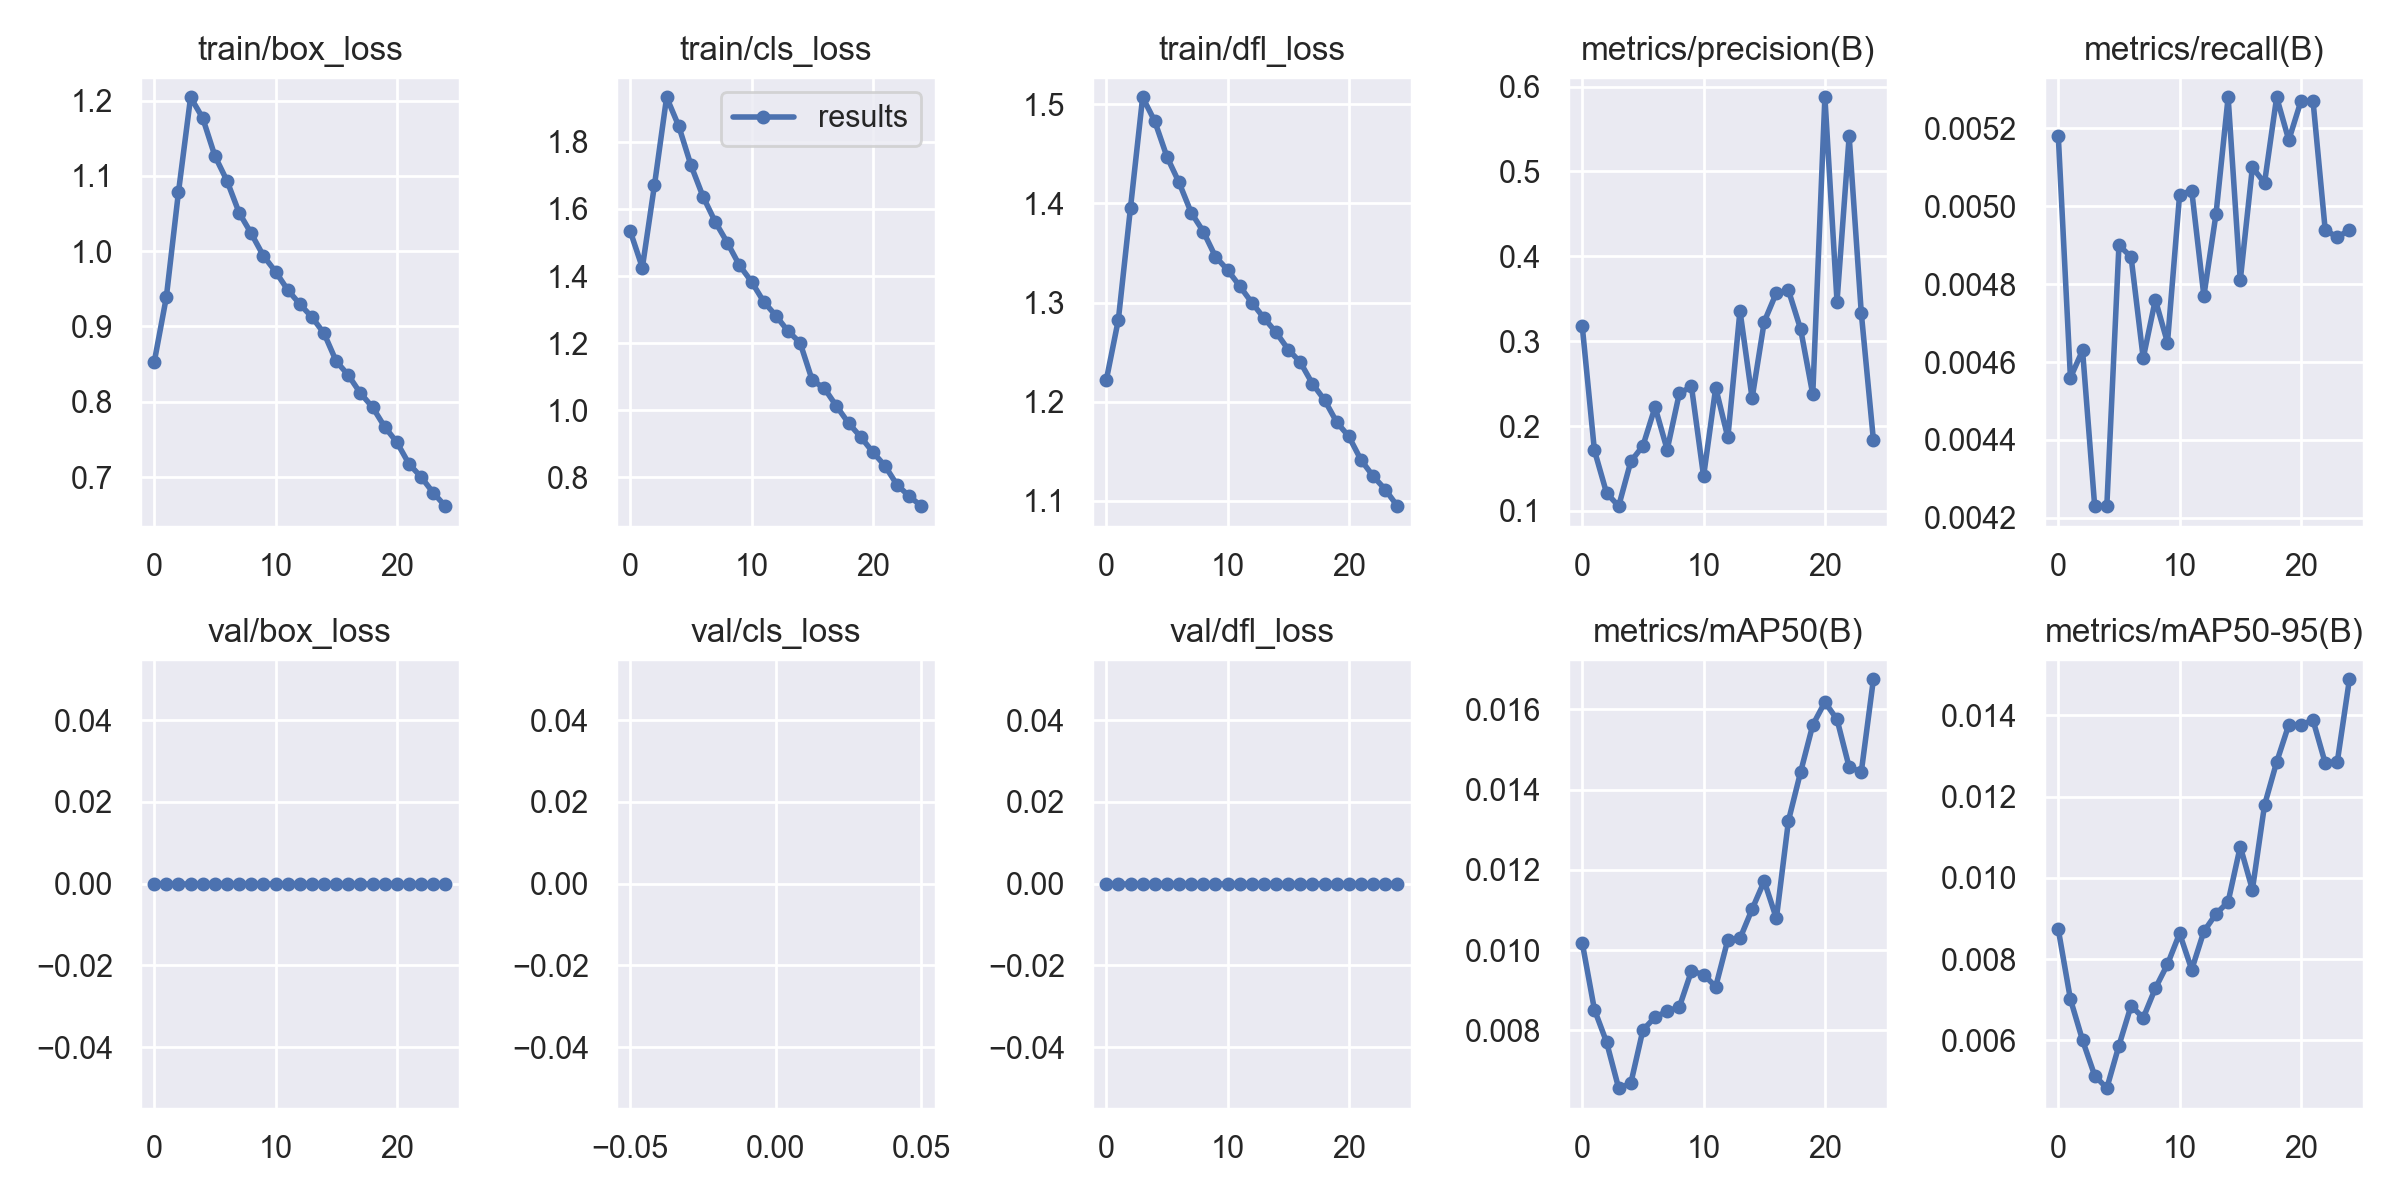

In [12]:
# Trained Model Results
Image(filename="runs/detect/train_25Epochs/results.png")

In [13]:
# Using the best model
model = YOLO("D:/Object Detection YoloV8/runs/detect/train_25epochs/weights/best.pt")

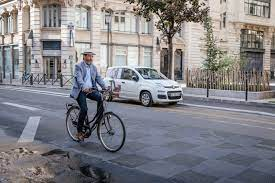

In [14]:
# Image to identify Objects From
identify = "test\download (3).jpg"
Image(filename=identify)

In [15]:
# Identify the objects from the Image
model.predict(source=identify, show=True, save=True, conf=0.4)

WARNING  Environment does not support cv2.imshow() or PIL Image.show()


image 1/1 D:\Object Detection YoloV8\test\download (3).jpg: 448x640 1 car, 1 person, 97.7ms
Speed: 0.0ms preprocess, 97.7ms inference, 9.2ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict2


[{ '_keys': <generator object Results.__init__.<locals>.<genexpr> at 0x000001BED934B610>,
   'boxes': ultralytics.yolo.engine.results.Boxes
 type:  torch.Tensor
 shape: torch.Size([2, 6])
 dtype: torch.float32
 tensor([[ 70.00000,  50.00000, 112.00000, 142.00000,   0.86459,  14.00000],
         [104.00000,  65.00000, 184.00000, 107.00000,   0.50887,   6.00000]], device='cuda:0'),
   'masks': None,
   'names': { 0: 'aeroplane',
              1: 'bicycle',
              2: 'bird',
              3: 'boat',
              4: 'bottle',
              5: 'bus',
              6: 'car',
              7: 'cat',
              8: 'chair',
              9: 'cow',
              10: 'diningtable',
              11: 'dog',
              12: 'horse',
              13: 'motorbike',
              14: 'person',
              15: 'pottedplant',
              16: 'sheep',
              17: 'sofa',
              18: 'train',
              19: 'tvmonitor'},
   'orig_img': array([[[202, 215, 231],
         [128

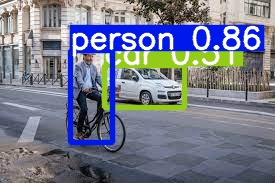

In [16]:
# Show Identified Image
folder_path = r'D:\Object Detection YoloV8\runs\detect'
file_type = r'\*'
files = glob.glob(folder_path + file_type + "\\")
max_file = max(files, key=os.path.getctime)
prediction = max_file + identify
prediction = prediction.replace("\\", "/")
prediction = prediction.replace("test/", '')
Image(filename=prediction)

In [18]:
# Streamlit app to allow users to easily upload images and get the objects inside them identified
%%writefile identify.py
import glob
import streamlit as st
from ultralytics import YOLO
import os.path
from PIL import Image


model = YOLO("D:/Object Detection YoloV8/runs/detect/train_25epochs/weights/best.pt")

def main():
    # st.title('Object Identification')
    html_temp="""
                <div style="background-color:#3B7FA8">
                <h2 style="color:white;text-align:center;">Object Identification</h2>
                </div>
              """
    st.markdown(html_temp,unsafe_allow_html=True)
    st.text("You can use this model to identify objects from images,\nthe model can identify the following objects:")
    ul = """
            <table>
                <li>Person</li>
                <li>Chair</li>
                <li>Car</li>
                <li>Bottle</li>
                <li>Cat</li>
                <li>Bird</li>
                <li>Bottedplant</li>
                <li>Sheep</li>
                <li>Boat</li>
                <li>Aeroplane</li>
                <li>TVMonitor</li>
                <li>Sofa</li>
                <li>Bicycle</li>
                <li>Horse</li>
                <li>Dinning Table</li>
                <li>Motor Bike</li>
                <li>Cow</li>
                <li>Train</li>
                <li>Bus</li>
            </ul>
    """
    st.markdown(ul,unsafe_allow_html=True)
    
    image = st.file_uploader("Choose an image", type=['jpg','png','jpeg'])
    # video = st.file_uploader("Choose a video", type=['mp4'])

    if image is not None:
        st.image(image)
        # with open(image.name, "wb") as f:
        #     f.write(image.getbuffer())
        #     st.success("Image Saved")
        if st.button('identify'):
            model.predict(source="test"+image.name, show=True, save=True, conf=0.5)
            folder_path = r'D:\\Object Detection YoloV8\\runs\detect'
            file_type = r'\*'
            files = glob.glob(folder_path + file_type + "\\")
            max_file = max(files, key=os.path.getctime)
            prediction = max_file + image.name
            identified = Image.open(prediction)
            st.image(identified)
    
    # if video is not None:
    #     st.video(video, start_time = 0)
    #     with open(video.name, "wb") as f:
    #         f.write(video.getbuffer())
    #         st.success("Video Saved")
    #     if st.button('identify'):
    #         model.predict(source=video.name, show=True, save=True, conf=0.5)
    #         folder_path = 'D:/Object Detection YoloV8/runs/detect'
    #         file_type = r'\*'
    #         files = glob.glob(folder_path + file_type + "/")
    #         max_file = max(files, key=os.path.getctime)
    #         prediction = max_file + video.name
    #         prediction = prediction.replace("\\", "/")
    #         video_file = open(prediction, 'rb')
    #         video_bytes = video_file.read()
    #         st.video(video_bytes, format="video/mp4" ,start_time = 0)
    #         st.success(prediction)

    
if __name__ =='__main__':
    main()

UsageError: Line magic function `%%writefile` not found.
